In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timezone, timedelta
from io import StringIO
import geohash2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")
import import_ipynb
import pm25_nowcast_aqi as aqi

importing Jupyter notebook from pm25_nowcast_aqi.ipynb
PM25: 35.9 AQI: 102


## Extraction - PM25 Last Hour

In [2]:
# Kedro Catalog
pm25_clean = catalog.load('pm25_clean')
# Data Frame Sensors
pm25_clean.head()

2022-09-10 17:18:01,618 - kedro.io.data_catalog - INFO - Loading data from `pm25_clean` (CSVDataSet)...


,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-05T13:35:00-05:00,21.0,20.0,24.0,26.0,25.0,26.0,16.0,7.0,21.0,34.0,26.0,25.0,25.0
1,2022-09-05T13:35:30-05:00,20.0,20.0,23.0,25.0,24.0,25.0,15.0,7.0,19.0,42.0,26.0,25.0,26.0
2,2022-09-05T13:36:00-05:00,20.0,20.0,24.0,NaN,23.0,26.0,16.0,8.0,18.0,39.0,27.0,25.0,24.0
3,2022-09-05T13:36:30-05:00,21.0,20.0,24.0,NaN,25.0,24.0,16.0,8.0,19.0,36.0,29.0,25.0,24.0
4,2022-09-05T13:37:00-05:00,22.0,22.0,24.0,NaN,26.0,26.0,14.0,7.0,19.0,39.0,29.0,26.0,23.0


In [3]:
# Check Data Types
pm25_clean.dtypes

DATETIME         object
TANGARA_2BBA    float64
TANGARA_14D6    float64
TANGARA_1CE2    float64
TANGARA_1FCA    float64
TANGARA_2492    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_4D7A    float64
TANGARA_532E    float64
TANGARA_EA06    float64
TANGARA_F1AE    float64
TANGARA_FAC6    float64
TANGARA_06BE    float64
dtype: object

## Descriptive Statistics

In [4]:
# Describe Data
pm25_clean.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,2825.000000,2736.000000,2789.000000,742.000000,2705.000000,2801.000000,2794.000000,2763.000000,2691.000000,2748.000000,2766.000000,2735.000000,2792.000000
mean,21.327788,24.020102,25.221585,28.367925,26.601109,26.601928,16.342878,5.638075,16.209959,32.102620,28.351048,21.418647,25.695201
std,5.604861,5.766191,6.884397,2.175981,6.408280,5.989012,6.234398,2.852142,8.403760,17.128851,11.751590,10.360962,5.936232
min,10.000000,12.000000,12.000000,23.000000,13.000000,14.000000,0.000000,2.000000,3.000000,9.000000,11.000000,9.000000,15.000000
25%,17.000000,20.000000,21.000000,27.000000,23.000000,22.000000,11.000000,3.000000,8.000000,15.000000,17.000000,11.000000,21.000000
50%,21.000000,23.000000,25.000000,28.000000,26.000000,26.000000,17.000000,5.000000,15.000000,29.000000,29.000000,20.000000,25.000000
75%,25.000000,28.000000,30.000000,30.000000,30.000000,30.000000,21.000000,8.000000,24.000000,48.000000,39.000000,31.000000,30.000000
max,37.000000,40.000000,43.000000,37.000000,43.000000,42.000000,36.000000,12.000000,38.000000,96.000000,69.000000,54.000000,42.000000


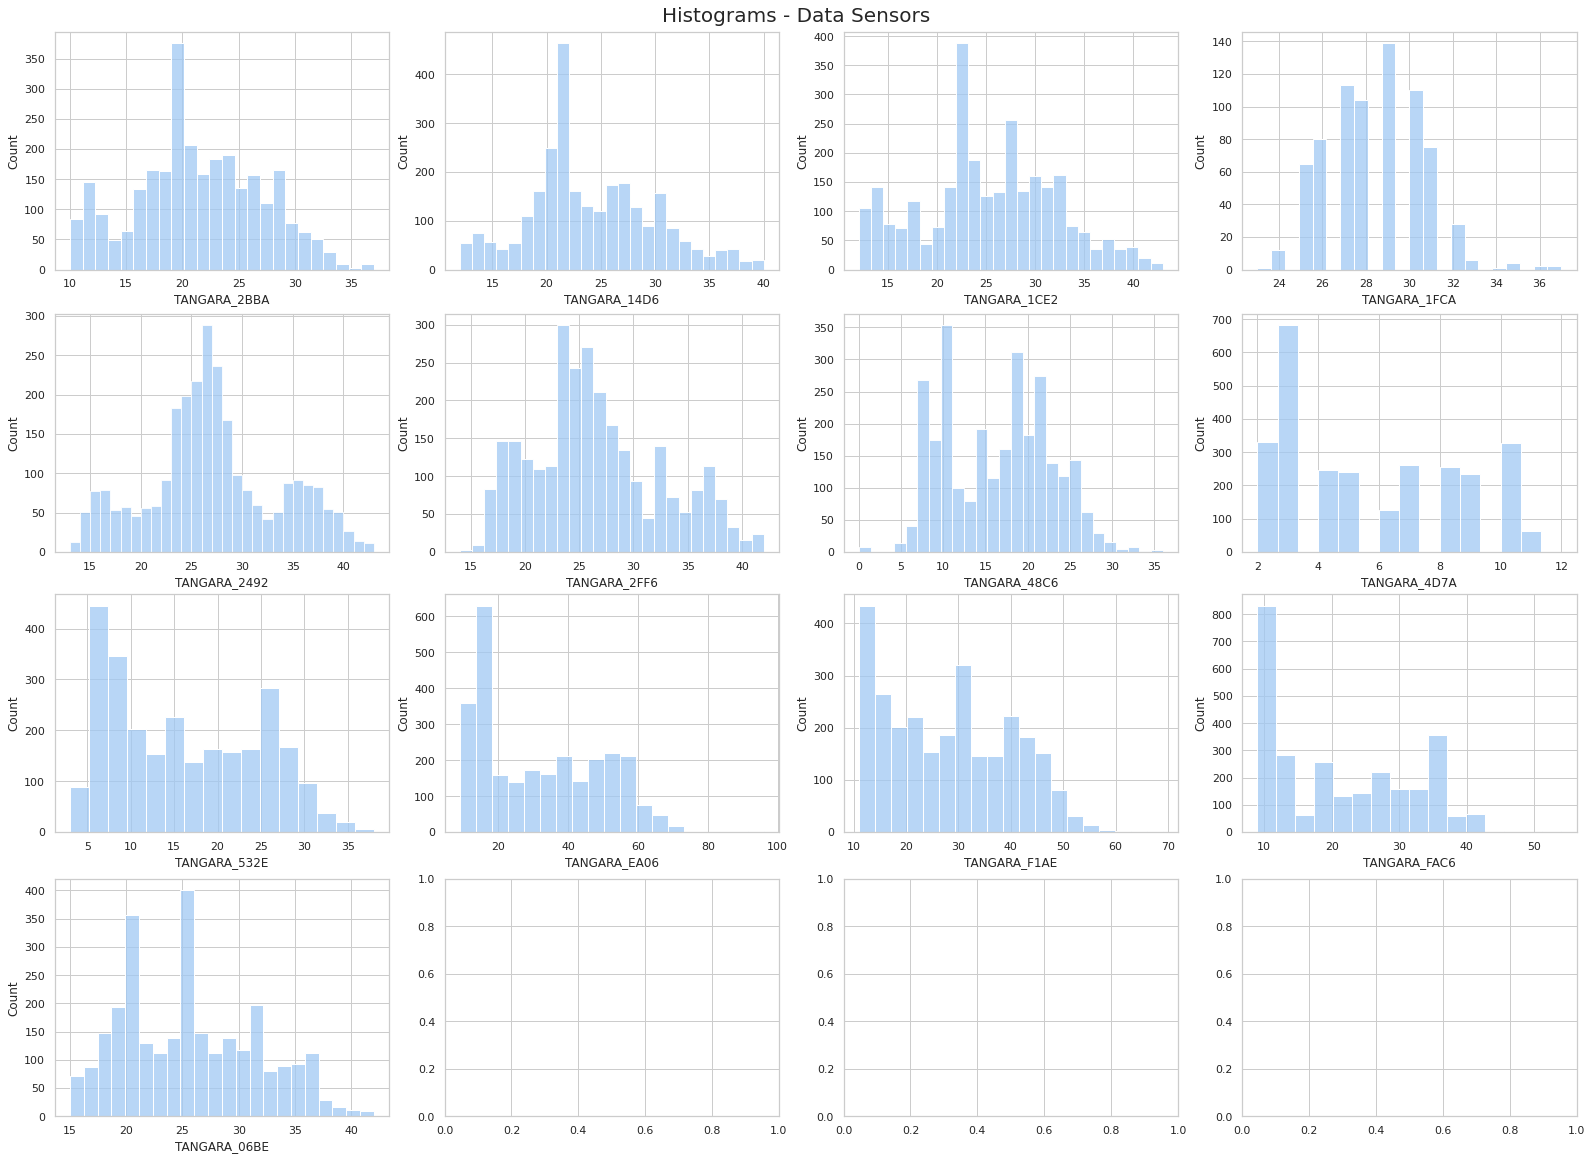

In [5]:
# Plot Histograms
aqi.histplots(pm25_clean)

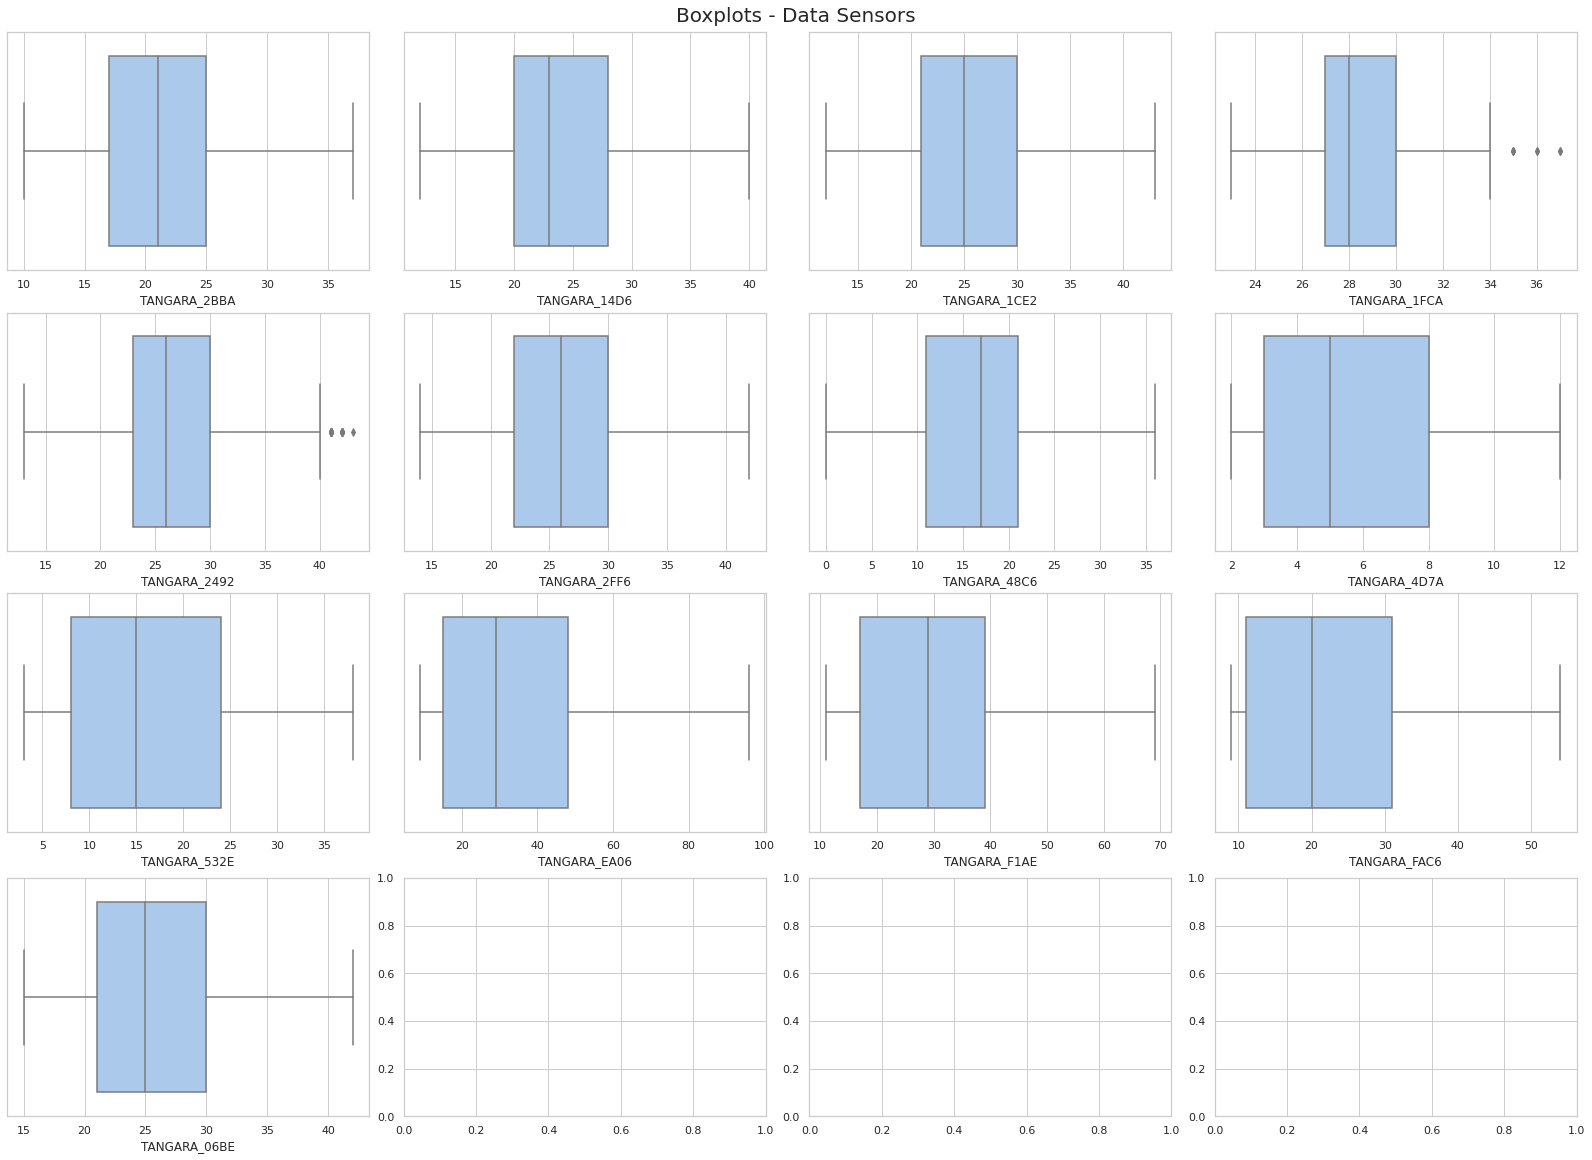

In [6]:
# Plot Boxplots
aqi.boxplots(pm25_clean)

In [7]:
# Get pm25 resample mean last hour
def resample_pm25_last_hour(data_sensors):
    # Timestamp Format
    data_sensors['DATETIME'] = pd.to_datetime(data_sensors['DATETIME'])
    return data_sensors.resample('H', on='DATETIME', origin='end').mean().reset_index()#.median().reset_index()

In [8]:
# PM25 Last Hour
pm25_last_hour = resample_pm25_last_hour(pm25_clean)
pm25_last_hour.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-05 14:34:30-05:00,20.625000,20.403361,22.369748,26.972973,30.030303,25.555556,16.848739,7.416667,19.350877,39.441667,29.707965,25.777778,25.285714
1,2022-09-05 15:34:30-05:00,20.175000,20.075630,20.764706,25.844828,26.931373,25.550847,17.672269,7.720339,19.452174,39.770642,30.155172,25.378151,25.474576
2,2022-09-05 16:34:30-05:00,20.883333,22.008333,21.826087,28.647059,24.864407,25.364407,18.075000,7.482456,21.422414,42.401786,34.887931,27.459459,25.403361
3,2022-09-05 17:34:30-05:00,21.862069,21.605263,23.203540,28.521739,20.973451,25.965217,20.112069,4.639640,11.300000,25.596154,32.184211,17.009434,26.096491
4,2022-09-05 18:34:30-05:00,22.025210,22.820513,24.872881,28.907563,14.803419,18.470588,12.239316,3.491379,10.336283,18.655172,29.198198,12.963303,21.186441


In [9]:
# Describe Data
pm25_clean.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,2825.000000,2736.000000,2789.000000,742.000000,2705.000000,2801.000000,2794.000000,2763.000000,2691.000000,2748.000000,2766.000000,2735.000000,2792.000000
mean,21.327788,24.020102,25.221585,28.367925,26.601109,26.601928,16.342878,5.638075,16.209959,32.102620,28.351048,21.418647,25.695201
std,5.604861,5.766191,6.884397,2.175981,6.408280,5.989012,6.234398,2.852142,8.403760,17.128851,11.751590,10.360962,5.936232
min,10.000000,12.000000,12.000000,23.000000,13.000000,14.000000,0.000000,2.000000,3.000000,9.000000,11.000000,9.000000,15.000000
25%,17.000000,20.000000,21.000000,27.000000,23.000000,22.000000,11.000000,3.000000,8.000000,15.000000,17.000000,11.000000,21.000000
50%,21.000000,23.000000,25.000000,28.000000,26.000000,26.000000,17.000000,5.000000,15.000000,29.000000,29.000000,20.000000,25.000000
75%,25.000000,28.000000,30.000000,30.000000,30.000000,30.000000,21.000000,8.000000,24.000000,48.000000,39.000000,31.000000,30.000000
max,37.000000,40.000000,43.000000,37.000000,43.000000,42.000000,36.000000,12.000000,38.000000,96.000000,69.000000,54.000000,42.000000


In [10]:
# Describe Data
pm25_last_hour.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,24.000000,24.000000,24.000000,7.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.325800,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
std,5.380139,5.648283,6.808559,1.746974,6.082966,5.856329,5.811612,2.842651,8.238649,16.973664,11.381201,10.409445,5.680177
min,11.553398,14.211864,13.525000,25.844828,14.803419,17.767241,7.359649,2.364407,6.721739,12.966667,12.274510,9.666667,17.550847
25%,16.777083,20.321429,21.560742,27.747356,22.531780,23.104627,10.987500,2.857110,8.268553,14.903484,17.463007,10.891277,21.148164
50%,21.372701,23.868506,25.281573,28.647059,26.317797,25.795109,16.845203,4.788846,14.142788,28.766810,29.453081,19.430172,25.438969
75%,24.925000,27.645209,29.999620,29.562477,29.885781,29.120089,20.939890,7.875724,24.363551,47.478992,38.426029,30.458387,29.193147
max,31.416667,36.269565,39.508475,30.914894,38.922414,38.241667,25.282051,9.773913,30.801802,62.641509,46.000000,40.179245,36.805085


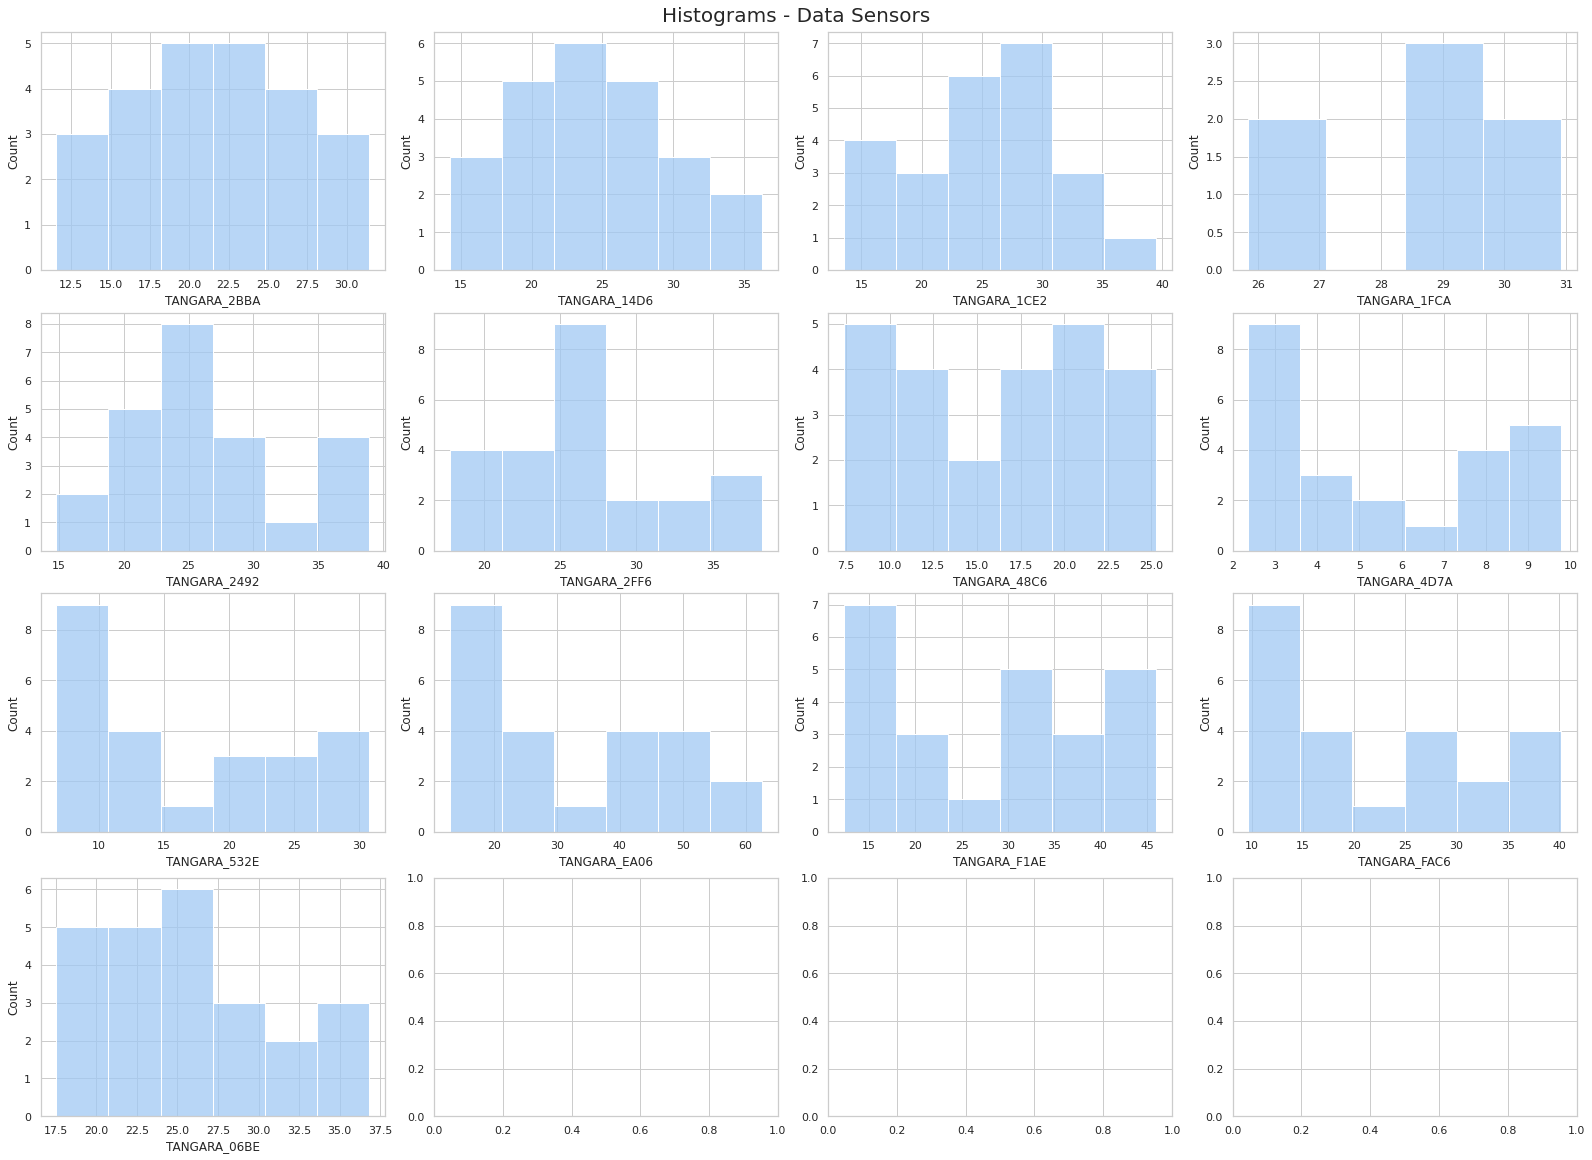

In [11]:
# Plot Histograms
aqi.histplots(pm25_last_hour)

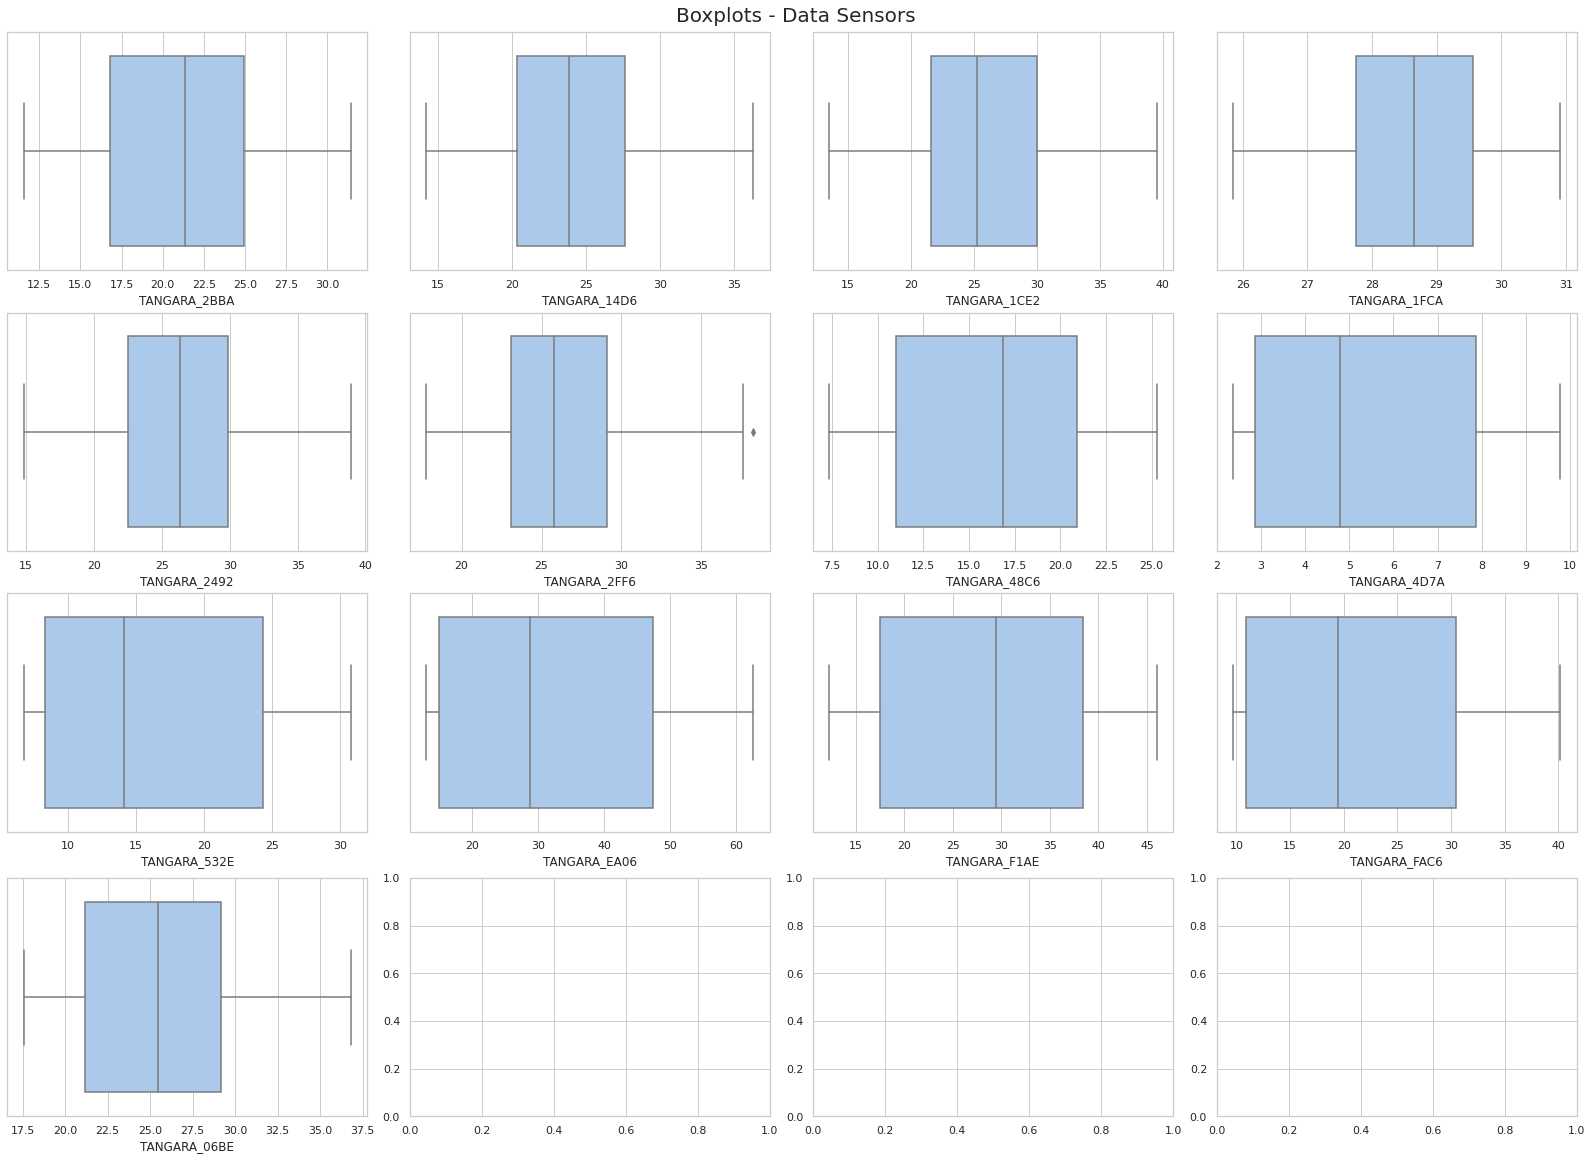

In [12]:
# Plot Boxplots
aqi.boxplots(pm25_last_hour)

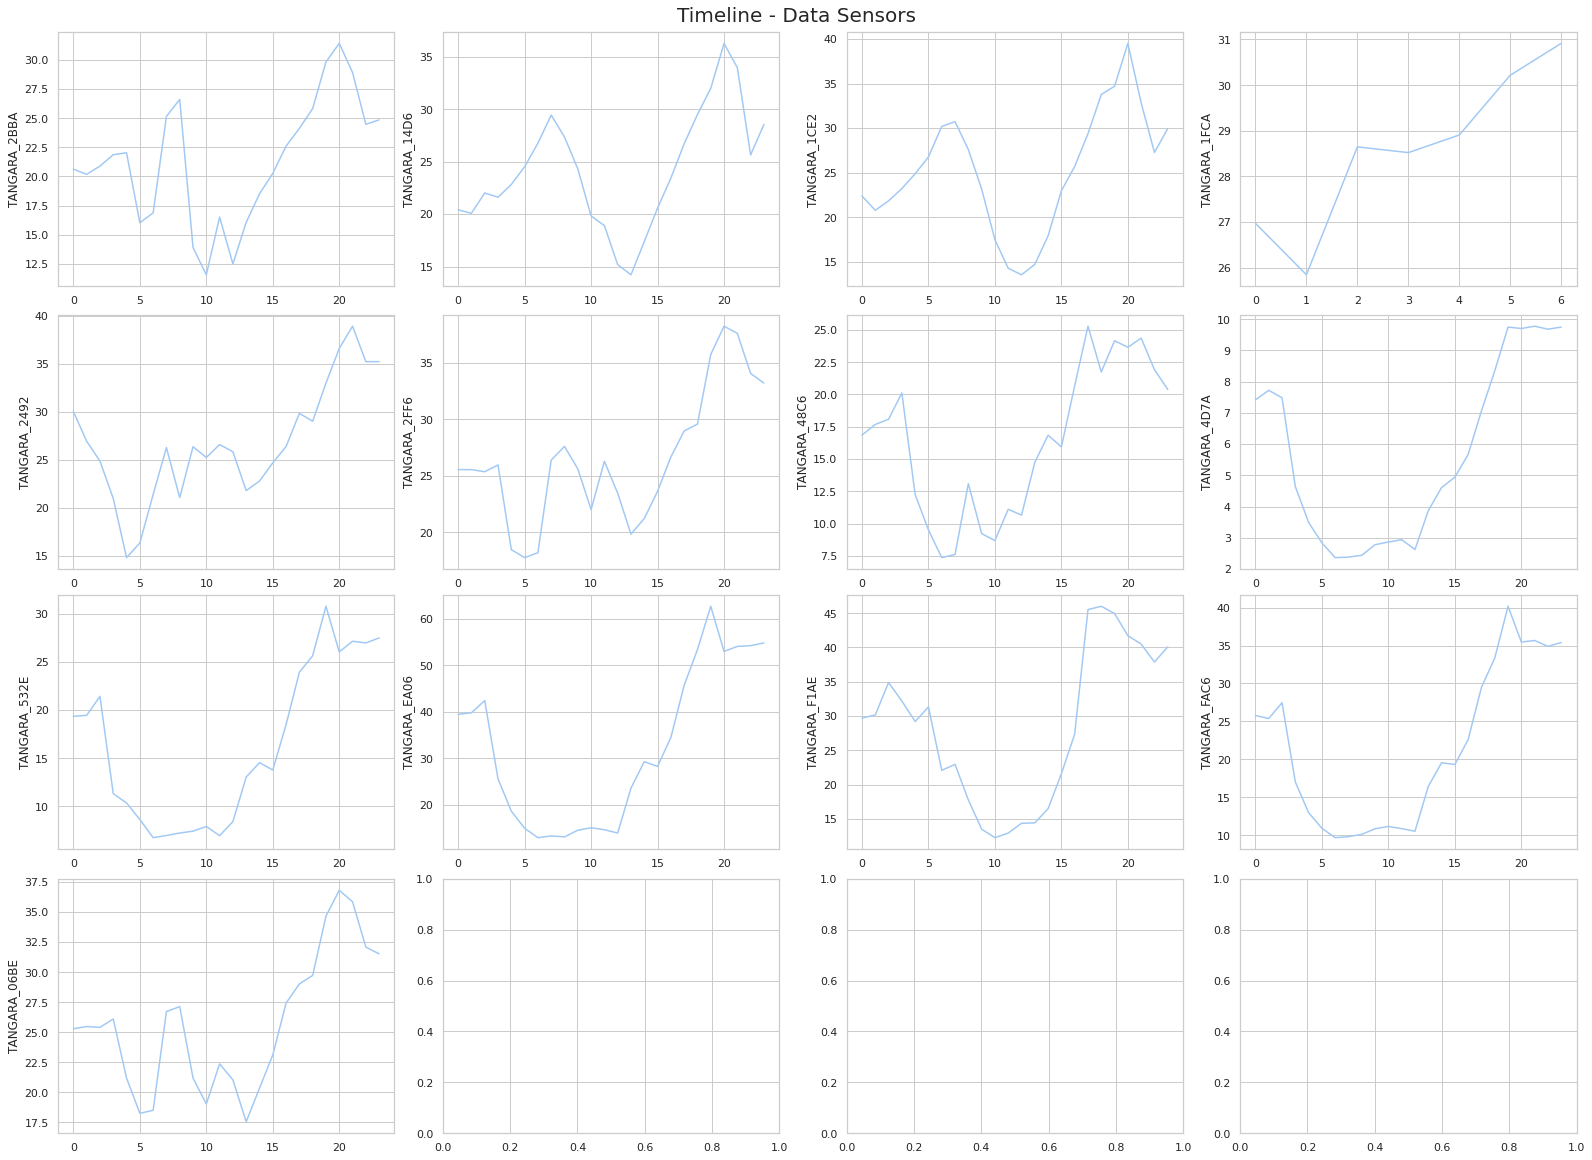

In [13]:
# Plot Lineplots
aqi.lineplots(pm25_last_hour)

In [14]:
# Save pm25_last_hour into Catalog
catalog.save('pm25_last_hour', pm25_last_hour)

2022-09-10 17:18:41,584 - kedro.io.data_catalog - INFO - Saving data to `pm25_last_hour` (CSVDataSet)...
